#Projet final pour le cours M1MAS "Apprentissage pour l'image", année 2023-2024

## Consignes

### Date et modalité
Ce projet est à rendre au plus tard le ?
Les projets sont à envoyer par email à

  ```
  emile.pierret@univ-orleans.fr
  ```

sous forme d’un python notebook (*.ipynb) contenant la sortie des cellules. Le fichier doit être nommé
  ```
  NOM_Prenom_Projet.ipynb
  ```
Si le fichier dépasse la taille de 5 Mo merci de l'envoyer par un lien cloud (comme https://filesender.renater.fr/, dropbox, filetransfer...).


On conseille de travailler avec Google Colab.
Depuis Colab vous devez faire
```
  Fichier -> Télécharger le fichier .ipynb
```
pour récupérer le fichier à envoyer.

## Plagiat


Ce qui suit est un plagiat de https://www.larousse.fr/dictionnaires/francais/plagiat/61301 :

"Plagiat, nom masculin, (de plagiaire) :

— Acte de quelqu’un qui, dans le domaine artistique ou littéraire, donne pour sien ce qu’il a pris à l’œuvre
d’un autre.

— Ce qui est emprunté, copié, démarqué."

Tout plagiat de texte est strictement interdit.
Le plagiat de morceaux de code est autorisé à condition que chaque source soit citée, en précisant le lien internet par exemple.
Cette règle ne s'applique pas au code du tutoriel vu en cours qui sera la base de travail à savoir :

https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py


## Travail attendu

Il est attendu que:
* Toute cellule de code soit précédée par une description de ce qu'elle contient.
* Chaque résultat obtenu soit commenté.


#Classification de la base FashionMNIST par réseau de neurones

###Question 1 :
En utilisant la classe
```
CLASS torchvision.datasets.FashionMNIST
```
documentée ici :

https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

définir les objets `trainset`, `trainloader`, `testset`, `testloader` et `classes` en définissant une fonction transform qui ramène les niveaux de gris dans l'intervalle $[-1,1]$.

Afficher quelques images avec leur classe correspondante.

In [1]:
#TODO

###Question 2 :

Décrire quantitativement la base de données en répondant aux questions suivantes :

* Quelle est la taille de chaque image ?
* Combien y a-t-il d'images au total pour `trainset` et `testset` ?
* Combien d'images par classe ?
* Combien de classes ?

On pourra proposer un script pour répondre aux questions.


In [2]:
#TODO

## Réseau de neurones convolutionnel (CNN)

On souhaite définir un réseau de neurones convolutionnel (CNN) qui s'applique aux images de `FashionMNIST`et effectue la suite d'opérations suivante :

**Partie CNN :**
 * Une convolution 2D de noyau de taille 5x5 avec 12 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2
 * Une convolution 2D de noyau de taille 5x5 avec 20 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2

**Partie linéaire :**
 * Une couche linéaire avec dimension de sortie 100, suivie d'une activation  ReLU.
 * Une couche linéaire avec dimension de sortie 60, suivie d'une activation  ReLU.
 * Une couche linéaire finale permettant la classification.



###Question 3 :

Etant donné un batch `x` (dont on précisera les dimensions) en entrée du CNN, expliciter les dimensions des tenseurs en entrée et en sortie de chacune des couches successives du réseau. On prendra soin de préciser les opérations nécessaires pour passer de la partie CNN à la partie linéaire.

TODO

###Question 4 :
Définir une class `CNNet` qui implémente le modèle décrit ci-dessus.

Définir un réseau cnnet = CNNet() et tester sa fonction `forward` sur un batch du `trainset`.

Afficher quel est le nombre de paramètres du réseau.

##Entraînement du réseau

###Question 5 :
Proposer un script qui entraîne le réseau `cnnet` sur 10 epochs avec affichage à chaque epochs de l'"epoch loss" (moyenne des loss sur chaque batch considérés dans l'epoch, soit la "running loss" accumulée sur toute l'epoch) et du temps total de l'entraînement.



### Question 6 :

Expliquer la relation mathématique entre la sortie du réseau de neurones et la classe prédite par le réseau de neurone. Justifier cette formule.


### Question 7 :
A l'aide des fonctions de ```sklearn```utilisées en cours, évaluer la performance du réseau entraîné (rapport de classification et matrice de confusion).

Commenter les résultats. Que proposez-vous pour améliorer les performances du réseau ?

### Question 8 :

Le code ci-dessous permet de charger 5 images sous forme de tensor et de les afficher. Que représente chacune de ces images ?


Faire passer ces images dans le réseau. Que se passe-t-il ? ( Il se peut que cela provoque des erreurs ). Expliquer.

**Attention :** Pour rappel, les images sont renormalisées avant de passer dans le réseau.

In [3]:
!git clone 'https://github.com/emilePi/Images_2024'

Clonage dans 'Images_2024'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Réception d'objets: 100% (13/13), 6.57 Kio | 6.57 Mio/s, fait.
Résolution des deltas: 100% (2/2), fait.


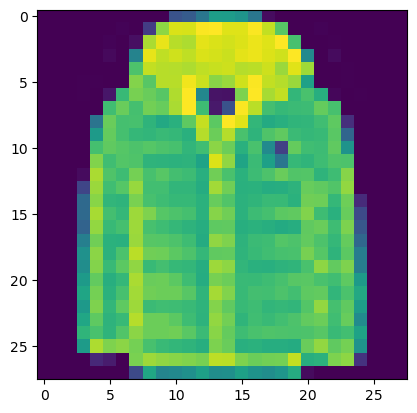

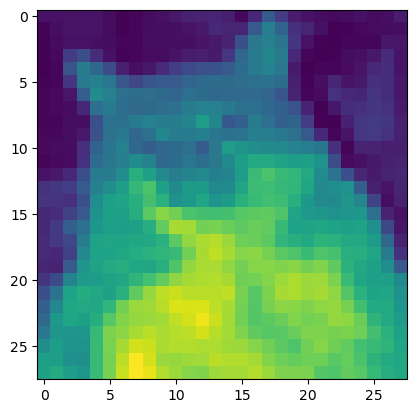

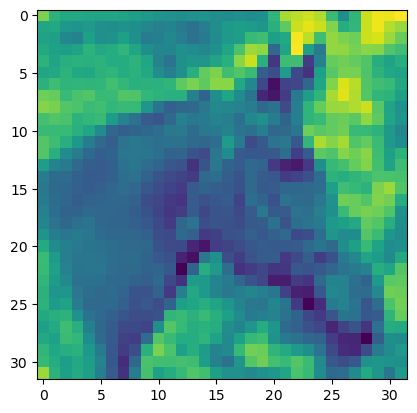

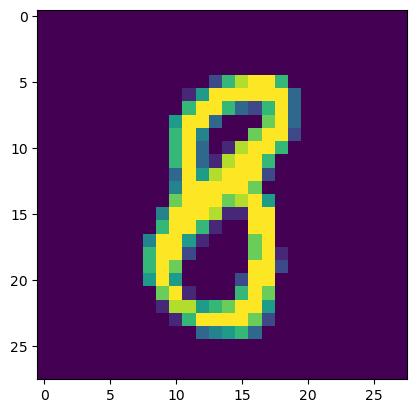

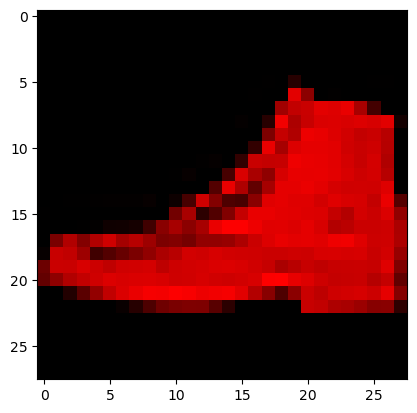

In [14]:
import pylab as plt
import numpy as np
from PIL import Image
from torchvision.transforms.functional import to_tensor

img1 = to_tensor(Image.open('./Images_2024/coat.png'))

img2 = to_tensor(Image.open('./Images_2024/cat.png'))

img3 = to_tensor(Image.open('./Images_2024/horse.png'))

img4 = to_tensor(Image.open('./Images_2024/MNIST.png'))

img5 = to_tensor(Image.open('./Images_2024/red_shoes.png'))

for img in [img1,img2,img3,img4,img5] :
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0))) 
    plt.show()

## Comparaison avec un réseau à une couche cachée

Pour finir nous allons comparer la performance du réseau CNN avec un réseau simple à une seule couche cachée.

On va utiliser l'architecture suivante :

* Une couche linéaire avec dimension de sortie 300, suivie d'une activation  ReLU.
* Une couche linéaire finale permettant la classification.

###Question 9 :
Définir une class `MLP` qui implémente le modèle décrit ci-dessus.

Définir un réseau mlp = MLP() et tester sa fonction `forward` sur un batch du `trainset`.

Afficher quel est le nombre de paramètres du réseau `mlp`. Commenter.

In [11]:
#TODO

###Question 10 :
Adapter les scripts des questions 5 et 7 pour entraîner le réseau `mlp` et évaluer sa performance.

Comparer les performances des deux réseaux entraînés.



In [12]:
#TODO